In [1]:
import pandas as pd
import numpy as np 
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aapl=yf.Ticker('SBIN.NS')
data=aapl.history(start = "2021-06-06",
                          end= "2023-06-06",
                          interval='1d')
print(data.to_string())

                                 Open        High         Low       Close     Volume  Dividends  Stock Splits
Date                                                                                                         
2021-06-07 00:00:00+05:30  420.247654  422.469130  416.094419  417.494934   20201197        0.0           0.0
2021-06-08 00:00:00+05:30  417.494913  417.736379  409.526532  412.617310   31113823        0.0           0.0
2021-06-09 00:00:00+05:30  412.907067  417.543205  403.924539  407.063599   27784834        0.0           0.0
2021-06-10 00:00:00+05:30  410.395824  418.509080  407.981163  417.494934   27397712        0.0           0.0
2021-06-11 00:00:00+05:30  420.006183  420.633989  410.733878  414.935394   26831924        0.0           0.0
2021-06-14 00:00:00+05:30  412.424138  417.688111  402.475746  415.659790   30106015        0.0           0.0
2021-06-15 00:00:00+05:30  414.549059  418.026147  413.390009  414.838806   16413658        0.0           0.0
2021-06-16

In [3]:
high=data.Close[0]
low=data.Close[0]
l=len(data)
zero_data = np.zeros(shape=(l,1))
Donchian = pd.DataFrame(zero_data)
Donchian.index=data.index
zero_dat = np.zeros(shape=(l,1))
Peak = pd.DataFrame(zero_dat)
Peak.index=data.index
zero_da = np.zeros(shape=(l,1))
Trough = pd.DataFrame(zero_da)
Trough.index=data.index
for k in range(0,20):
    m=0
    while (m<k):
        if(data.Close[k-m]>high):
            high=data.Close[k-m]
        if(data.Close[k-m]<low):
            low=data.Close[k-m]
        m=m+1
    Donchian.iloc[k,0]=high/2+low/2
    Peak.iloc[k,0]=high
    Trough.iloc[k,0]=low
for i in range(20,l):
    high=data.Close[i]
    low=data.Close[i]
    j=20
    while (j>0):
        if(data.Close[i-j]>high):
            high=data.Close[i-j]
        if(data.Close[i-j]<low):
            low=data.Close[i-j]
        j=j-1
    Donchian.iloc[i,0]=(high+low)/2
    Peak.iloc[i,0]=high
    Trough.iloc[i,0]=low
print(Peak)        
        
        

                                    0
Date                                 
2021-06-07 00:00:00+05:30  417.494934
2021-06-08 00:00:00+05:30  417.494934
2021-06-09 00:00:00+05:30  417.494934
2021-06-10 00:00:00+05:30  417.494934
2021-06-11 00:00:00+05:30  417.494934
...                               ...
2023-05-30 00:00:00+05:30  583.658020
2023-05-31 00:00:00+05:30  583.658020
2023-06-01 00:00:00+05:30  583.658020
2023-06-02 00:00:00+05:30  587.200012
2023-06-05 00:00:00+05:30  587.200012

[496 rows x 1 columns]


<Axes: title={'center': 'Donichian'}, xlabel='Date', ylabel='0'>

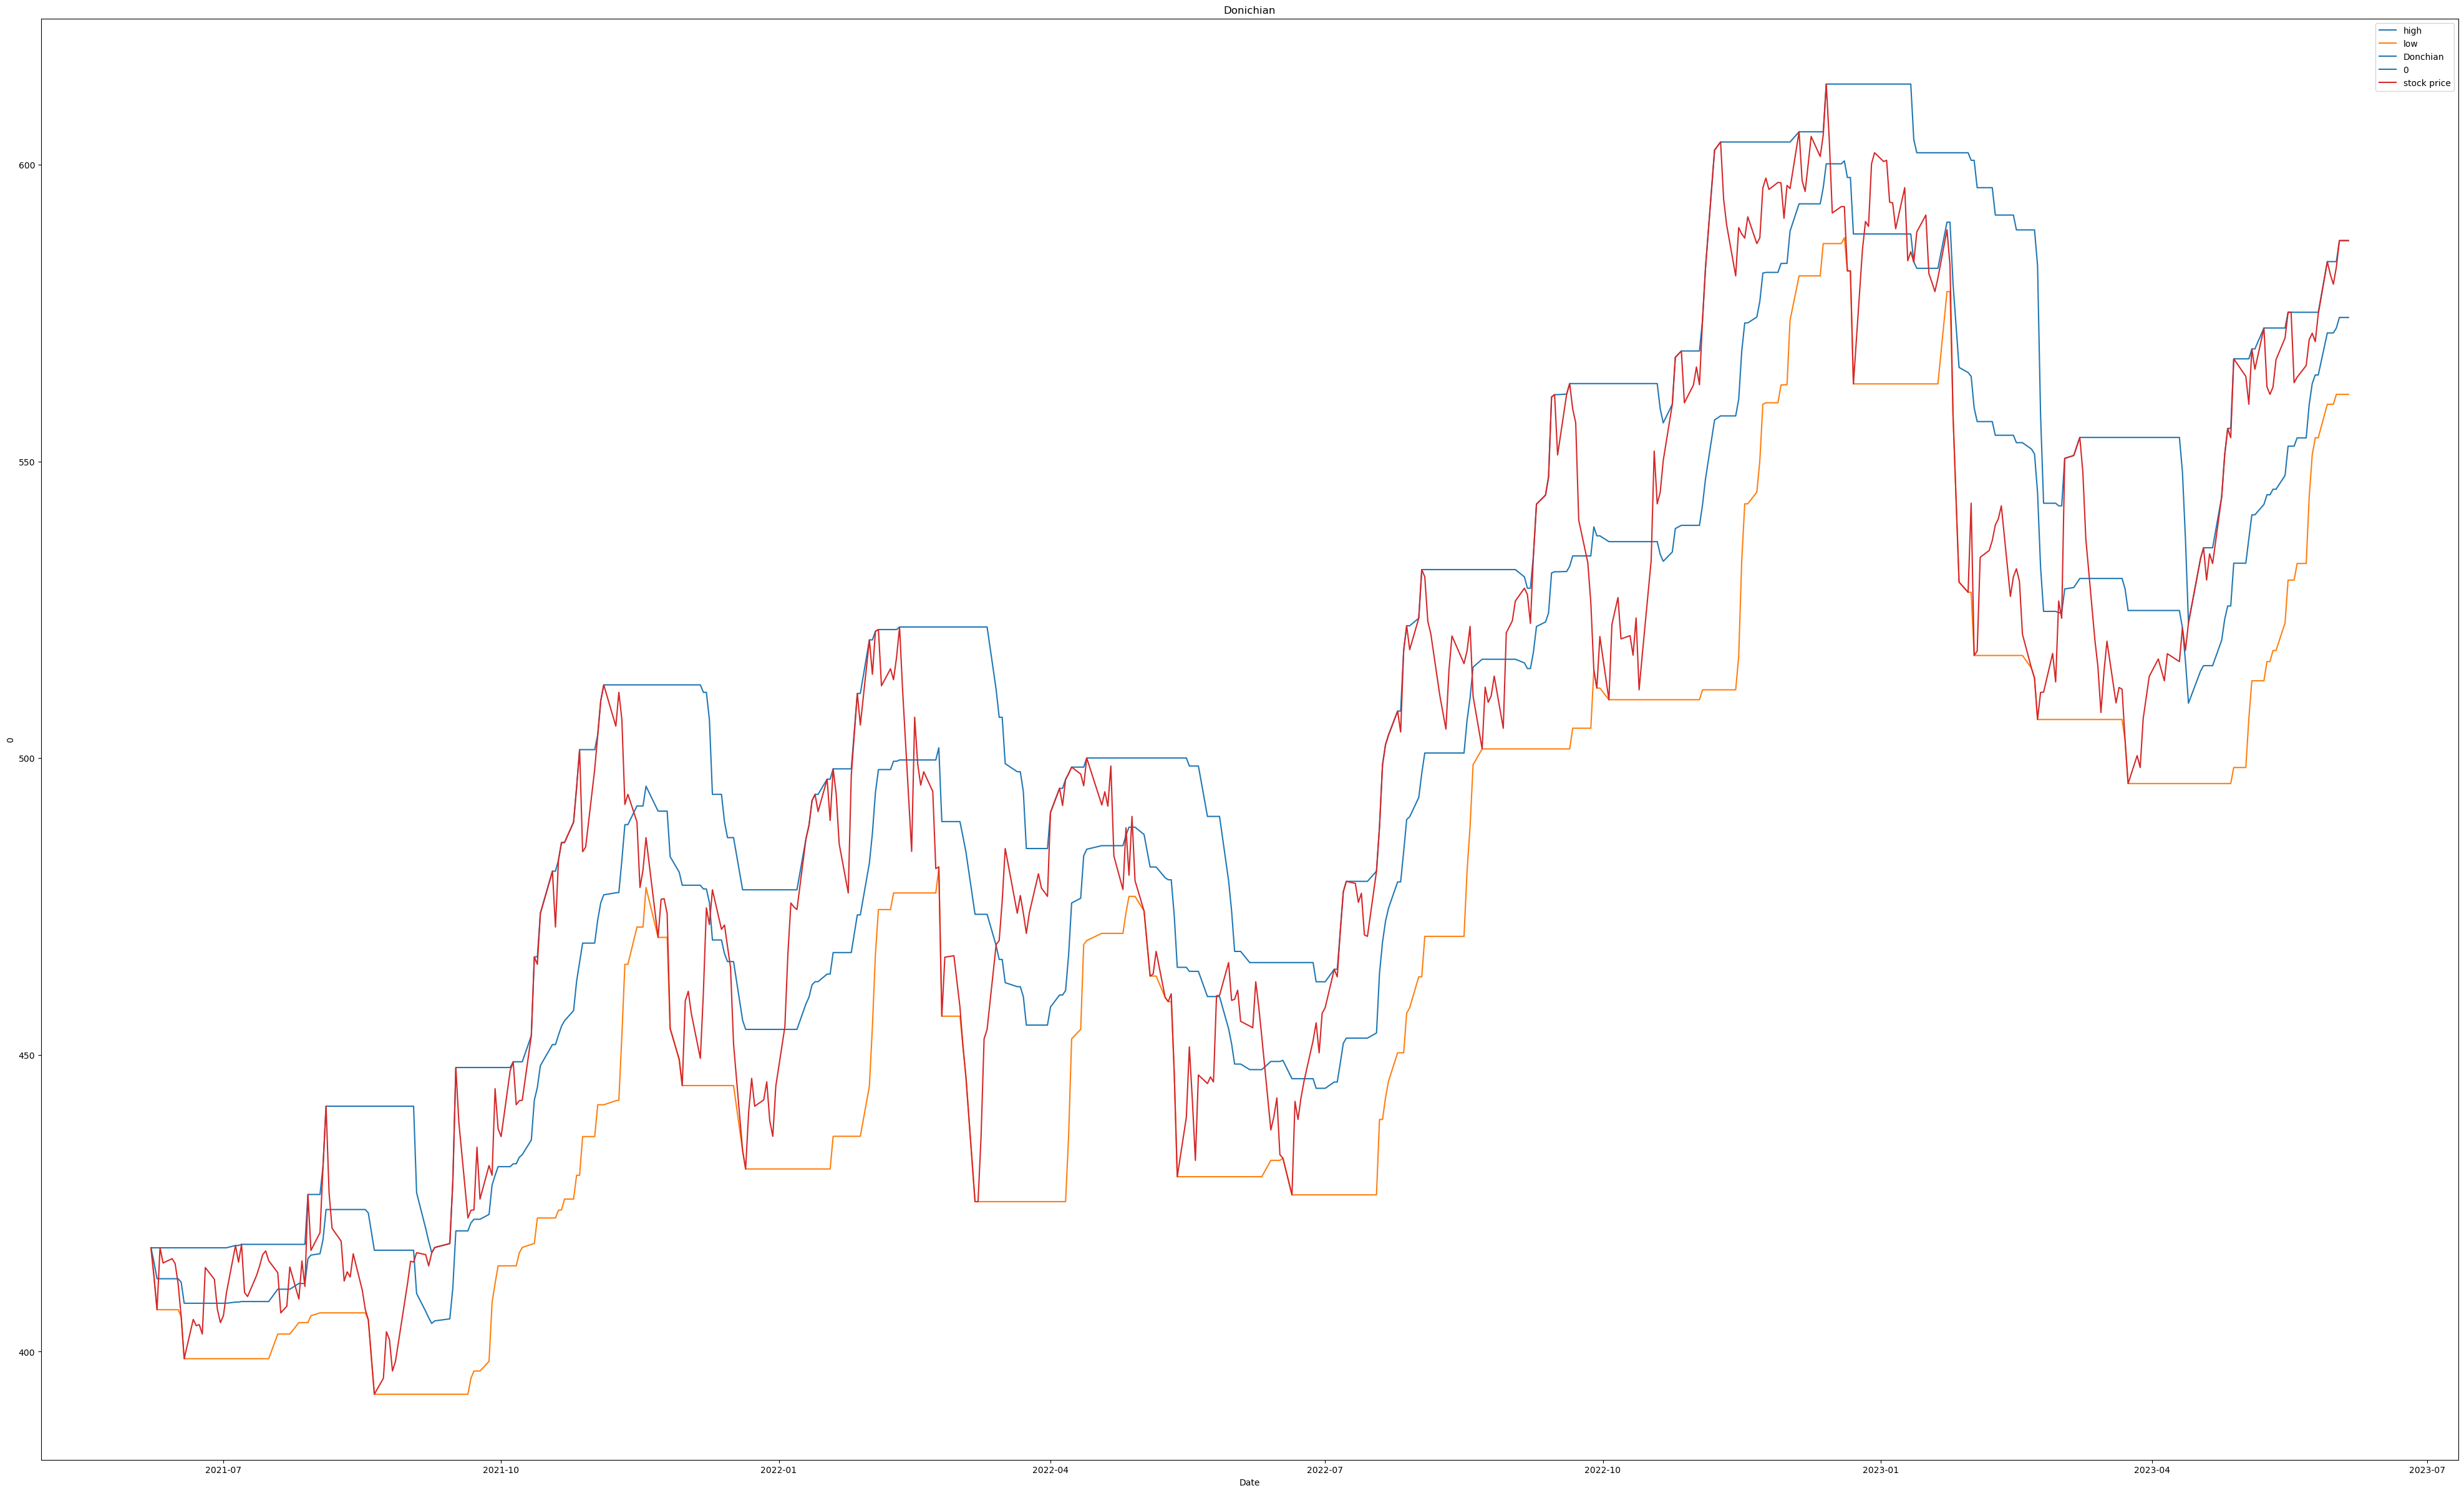

In [4]:
plt.figure(figsize=(50,30))
plt.title("Donichian")
sns.lineplot(data=Peak.iloc[:,0],label='high')
sns.lineplot(data=Trough.iloc[:,0],label='low')
sns.lineplot(data=Donchian,label='Donchian')
sns.lineplot(data=data.Close,label="stock price")

In [26]:
earlier_data=aapl.history(start='2021-05-14',
                          end="2021-06-03",
                          interval='1d')
#print(earlier_data)
profit=0
loss=0
zero_data=np.zeros(shape=(l+14,2))
galo=pd.DataFrame(zero_data)
#galo.index=data.index
for i in range (0,14) :
    if (earlier_data.Close[i]>earlier_data.Open[i]) :
        profit=profit+(earlier_data.Close[i]-earlier_data.Open[i])*100/(earlier_data.Open[i])
        galo.iloc[i,0]=(earlier_data.Close[i]-earlier_data.Open[i])*100/(earlier_data.Open[i])
        galo.iloc[i,1]=0
    elif earlier_data.Close[i]<earlier_data.Open[i] :
        loss=loss+(earlier_data.Open[i]-earlier_data.Close[i])*100/(earlier_data.Open[i])
        galo.iloc[i,1]=(earlier_data.Open[i]-earlier_data.Close[i])*100/(earlier_data.Open[i])
        galo.iloc[i,0]=0
avg_profit=profit/14
#print(avg_profit)
avg_loss=loss/14
#print(avg_loss)
zero_data=np.zeros(shape=(l,1))
rsi=pd.DataFrame(zero_data)
rsi.index=data.index
for n in range (0,l):
   
        if (data.Close[n]>=data.Open[n]):
            prof=(data.Close[n]-data.Open[n])*100/data.Open[n]
            rs=(avg_profit*13+prof)/(avg_loss*13)
            rsi.iloc[n,0]=100-(100/(1+rs))
            galo.iloc[n+14,0]=prof
            galo.iloc[n+14,1]=0
            avg_profit=(avg_profit*14-galo.iloc[n,0]+prof)/14
        elif(data.Close[n]<data.Open[n]):
            los=(data.Open[n]-data.Close[n])*100/data.Open[n]
            rs=(avg_profit*13)/(avg_loss*13+los)                   
            rsi.iloc[n,0]=100-100/(1+rs)
            galo.iloc[n+14,1]=los
            galo.iloc[n+14,0]=0
            avg_loss=(avg_loss*14-galo.iloc[n,1]+los)/14
print(rsi.to_string())
#print(galo.to_string())

                                   0
Date                                
2021-06-07 00:00:00+05:30  60.897029
2021-06-08 00:00:00+05:30  64.435188
2021-06-09 00:00:00+05:30  60.749097
2021-06-10 00:00:00+05:30  68.819667
2021-06-11 00:00:00+05:30  64.358151
2021-06-14 00:00:00+05:30  67.371822
2021-06-15 00:00:00+05:30  63.254271
2021-06-16 00:00:00+05:30  61.836274
2021-06-17 00:00:00+05:30  63.222275
2021-06-18 00:00:00+05:30  56.440705
2021-06-21 00:00:00+05:30  62.220532
2021-06-22 00:00:00+05:30  59.565873
2021-06-23 00:00:00+05:30  58.582519
2021-06-24 00:00:00+05:30  57.127116
2021-06-25 00:00:00+05:30  59.838219
2021-06-28 00:00:00+05:30  57.909646
2021-06-29 00:00:00+05:30  57.443734
2021-06-30 00:00:00+05:30  58.401530
2021-07-01 00:00:00+05:30  58.554799
2021-07-02 00:00:00+05:30  59.820693
2021-07-05 00:00:00+05:30  60.615965
2021-07-06 00:00:00+05:30  59.579890
2021-07-07 00:00:00+05:30  61.431325
2021-07-08 00:00:00+05:30  57.982752
2021-07-09 00:00:00+05:30  61.970237
2

<Axes: xlabel='Date', ylabel='Close'>

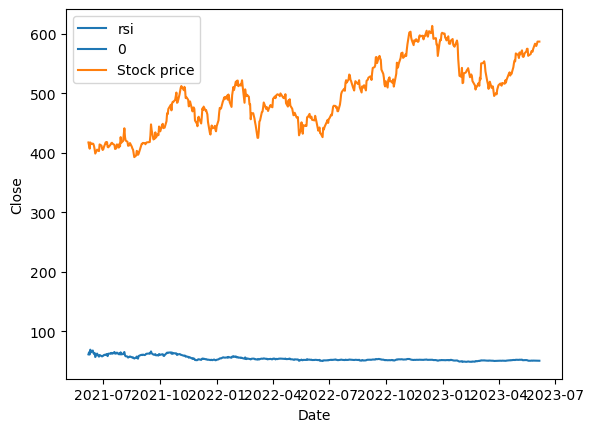

In [21]:
sns.lineplot(data=rsi,label='rsi')
sns.lineplot(data=data.Close,label="Stock price")

In [28]:
#Firstly,we create a strategy which is based only on the momentum indicator which is relative strength index. When rsi>67, we
#consider it a sell signal while rsi<48 indicates a buy signal.
thislist=[]
for i in range (0,l):
    if(rsi.iloc[i,0]>67):
        thislist.append("Sell")
    elif(rsi.iloc[i,0]<49):
        thislist.append("Buy")
    else:
        thislist.append("Hold")
        
signal1=pd.DataFrame(thislist)
signal1.index=data.index
print(signal1.to_string())
    

                              0
Date                           
2021-06-07 00:00:00+05:30  Hold
2021-06-08 00:00:00+05:30  Hold
2021-06-09 00:00:00+05:30  Hold
2021-06-10 00:00:00+05:30  Sell
2021-06-11 00:00:00+05:30  Hold
2021-06-14 00:00:00+05:30  Sell
2021-06-15 00:00:00+05:30  Hold
2021-06-16 00:00:00+05:30  Hold
2021-06-17 00:00:00+05:30  Hold
2021-06-18 00:00:00+05:30  Hold
2021-06-21 00:00:00+05:30  Hold
2021-06-22 00:00:00+05:30  Hold
2021-06-23 00:00:00+05:30  Hold
2021-06-24 00:00:00+05:30  Hold
2021-06-25 00:00:00+05:30  Hold
2021-06-28 00:00:00+05:30  Hold
2021-06-29 00:00:00+05:30  Hold
2021-06-30 00:00:00+05:30  Hold
2021-07-01 00:00:00+05:30  Hold
2021-07-02 00:00:00+05:30  Hold
2021-07-05 00:00:00+05:30  Hold
2021-07-06 00:00:00+05:30  Hold
2021-07-07 00:00:00+05:30  Hold
2021-07-08 00:00:00+05:30  Hold
2021-07-09 00:00:00+05:30  Hold
2021-07-12 00:00:00+05:30  Hold
2021-07-13 00:00:00+05:30  Hold
2021-07-14 00:00:00+05:30  Hold
2021-07-15 00:00:00+05:30  Hold
2021-07-

In [29]:
#We are only holding one stock at a time. We hold it until we encounter a sell signal.We again buy the stock at the next buy signal(encountered after it was sold)
checksy=0
cost=0
revenue=0
selling=0
costing=[]
selling=[]
returns=[]
for i in range (0,l):
    if(signal1.iloc[i,0]=="Buy" and checksy==0):
        checksy=1
        cost=data.Close[i]
        costing.append(cost)
    if (signal1.iloc[i,0]=="Sell" and checksy==1):
        sell=data.Close[i]
        selling.append(sell)
        checksy=0
        revenue+=sell-cost
        returns.append(revenue)
cos=pd.DataFrame(costing)
print(cos)
sel=pd.DataFrame(selling)
print(sel)
ret=pd.DataFrame(returns)
print(ret)

           0
0  529.65741
Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


In [30]:
#Secondly,we create a strategy based only on the volatility indicator which is Donechian in our case.If the stock price goes higher than the highest price of the past 20 days we create a sell position and if the stock price goes higher than the lowest price of the past 20 days we create a buy position. 

In [31]:
list2=[]
list2.append("Hold")
for i in range(1,l):
    if (Peak.iloc[i-1,0]<data.Close[i]):
        list2.append("Sell")
    elif (Trough.iloc[i-1,0]>data.Close[i]):
        list2.append("Buy")
    else :
        list2.append("Hold")        
signal2=pd.DataFrame(list2)
signal2.index=data.index
print(signal2.to_string())
        

                              0
Date                           
2021-06-07 00:00:00+05:30  Hold
2021-06-08 00:00:00+05:30   Buy
2021-06-09 00:00:00+05:30   Buy
2021-06-10 00:00:00+05:30  Hold
2021-06-11 00:00:00+05:30  Hold
2021-06-14 00:00:00+05:30  Hold
2021-06-15 00:00:00+05:30  Hold
2021-06-16 00:00:00+05:30  Hold
2021-06-17 00:00:00+05:30   Buy
2021-06-18 00:00:00+05:30   Buy
2021-06-21 00:00:00+05:30  Hold
2021-06-22 00:00:00+05:30  Hold
2021-06-23 00:00:00+05:30  Hold
2021-06-24 00:00:00+05:30  Hold
2021-06-25 00:00:00+05:30  Hold
2021-06-28 00:00:00+05:30  Hold
2021-06-29 00:00:00+05:30  Hold
2021-06-30 00:00:00+05:30  Hold
2021-07-01 00:00:00+05:30  Hold
2021-07-02 00:00:00+05:30  Hold
2021-07-05 00:00:00+05:30  Sell
2021-07-06 00:00:00+05:30  Hold
2021-07-07 00:00:00+05:30  Sell
2021-07-08 00:00:00+05:30  Hold
2021-07-09 00:00:00+05:30  Hold
2021-07-12 00:00:00+05:30  Hold
2021-07-13 00:00:00+05:30  Hold
2021-07-14 00:00:00+05:30  Hold
2021-07-15 00:00:00+05:30  Hold
2021-07-

In [32]:
#Finally,we make a strategy using both the indicators. In this strategy, we buy only when signals of both the indicators align.
signal_finale=[]
for i in range(0,l):
    if(signal1.iloc[i,0]==signal2.iloc[i,0]=="Buy"):
        signal_finale.append("Buy")
    elif(signal1.iloc[i,0]==signal2.iloc[i,0]=="Sell"):
        signal_finale.append("Sell")
    elif((signal1.iloc[i,0]=="Hold")and (signal2.iloc[i,0]=="Sell")):
        signal_finale.append("Sell")
    elif((signal1.iloc[i,0]=="Sell") and (signal2.iloc[i,0]=="Hold")):
        signal_finale.append("Sell")
    elif((signal1.iloc[i,0]=="Hold")and (signal2.iloc[i,0]=="Buy")):
        signal_finale.append("Buy")
    elif((signal1.iloc[i,0]=="Buy")and (signal2.iloc[i,0]=="Hold")):
        signal_finale.append("Buy")
    else:
        signal_finale.append("Hold")
signal=pd.Series(signal_finale)
signal.index=data.index
print(signal.to_string())

Date
2021-06-07 00:00:00+05:30    Hold
2021-06-08 00:00:00+05:30     Buy
2021-06-09 00:00:00+05:30     Buy
2021-06-10 00:00:00+05:30    Sell
2021-06-11 00:00:00+05:30    Hold
2021-06-14 00:00:00+05:30    Sell
2021-06-15 00:00:00+05:30    Hold
2021-06-16 00:00:00+05:30    Hold
2021-06-17 00:00:00+05:30     Buy
2021-06-18 00:00:00+05:30     Buy
2021-06-21 00:00:00+05:30    Hold
2021-06-22 00:00:00+05:30    Hold
2021-06-23 00:00:00+05:30    Hold
2021-06-24 00:00:00+05:30    Hold
2021-06-25 00:00:00+05:30    Hold
2021-06-28 00:00:00+05:30    Hold
2021-06-29 00:00:00+05:30    Hold
2021-06-30 00:00:00+05:30    Hold
2021-07-01 00:00:00+05:30    Hold
2021-07-02 00:00:00+05:30    Hold
2021-07-05 00:00:00+05:30    Sell
2021-07-06 00:00:00+05:30    Hold
2021-07-07 00:00:00+05:30    Sell
2021-07-08 00:00:00+05:30    Hold
2021-07-09 00:00:00+05:30    Hold
2021-07-12 00:00:00+05:30    Hold
2021-07-13 00:00:00+05:30    Hold
2021-07-14 00:00:00+05:30    Hold
2021-07-15 00:00:00+05:30    Hold
2021-07-1

In [33]:
checksy=0
cost=0
revenue=0
selling=0
costing=[]
selling=[]
returns=[]
for i in range (0,l):
    if(signal.iloc[i]=="Buy" and checksy==0):
        checksy=1
        cost=data.Close[i]
        costing.append(cost)
    if (signal.iloc[i]=="Sell" and checksy==1):
        sell=data.Close[i]
        selling.append(sell)
        checksy=0
        revenue=revenue+sell-cost
        returns.append(revenue)
#cos=pd.DataFrame(costing)
#print(cos)
#sel=pd.DataFrame(selling)
#print(sel)
#ret=pd.DataFrame(returns)
#print(ret)
print(revenue)

117.09625244140625


In [35]:
ret=revenue/cos.iloc[0,0]*100
print(ret)

22.107923027983592
